In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16



local_directory_path = r'/content/drive/MyDrive/archive/processed_images'

for dirname, _, filenames in os.walk(local_directory_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/archive/processed_images/train/cataract/image_1.png
/content/drive/MyDrive/archive/processed_images/train/cataract/image_104.png
/content/drive/MyDrive/archive/processed_images/train/cataract/image_106.png
/content/drive/MyDrive/archive/processed_images/train/cataract/image_10.png
/content/drive/MyDrive/archive/processed_images/train/cataract/image_100.png
/content/drive/MyDrive/archive/processed_images/train/cataract/image_102.png
/content/drive/MyDrive/archive/processed_images/train/cataract/image_109.png
/content/drive/MyDrive/archive/processed_images/train/cataract/image_108.png
/content/drive/MyDrive/archive/processed_images/train/cataract/image_103.png
/content/drive/MyDrive/archive/processed_images/train/cataract/image_107.png
/content/drive/MyDrive/archive/processed_images/train/cataract/image_101.png
/content/drive/MyDrive/archive/processed_images/train/cataract/image_105.png
/content/drive/MyDrive/archive/processed_images/train/cataract/image_110.png
/c

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile


IMAGE_SIZE = [150, 150]

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                    rotation_range = 20,
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1,
                                    shear_range = 0.1,
                                    zoom_range = 0.1,
                                    horizontal_flip = True

                                   )

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(r'/content/drive/MyDrive/archive/processed_images/train',
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    target_size = (150, 150))

test_generator =  test_datagen.flow_from_directory( r'/content/drive/MyDrive/archive/processed_images/test',
                                                          batch_size  = 32,
                                                          class_mode  = 'categorical',
                                                          target_size = (150, 150),
                                                          shuffle = False
                                                    )

Found 491 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


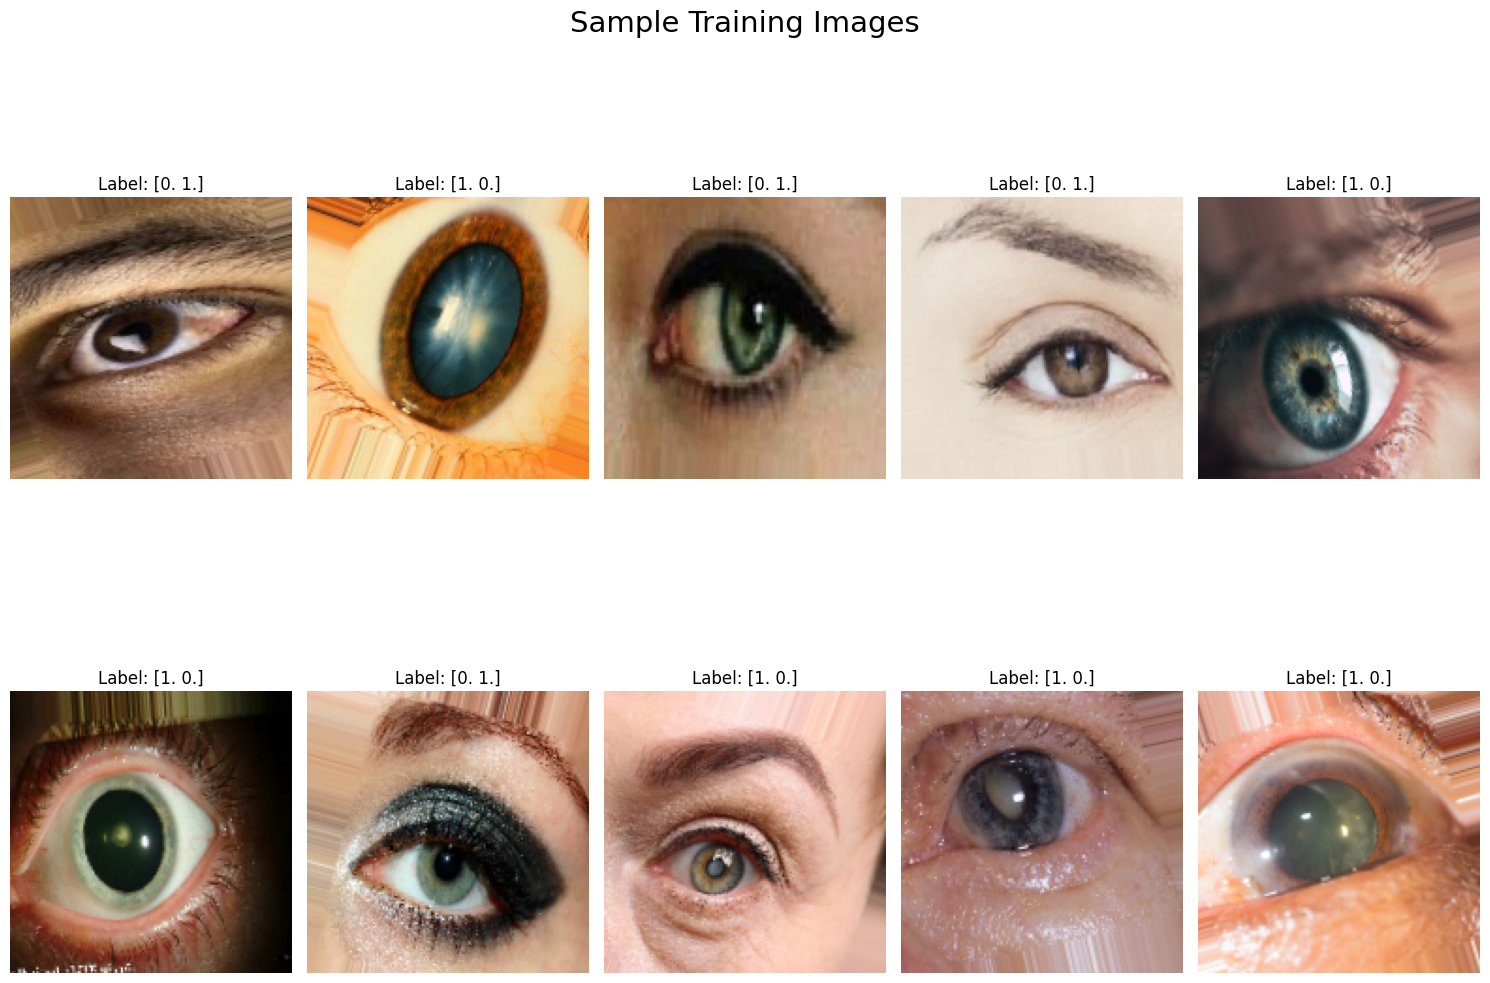

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

train_data, train_labels = train_generator[0]

for i in range(2):
    for j in range(5):
        label = train_labels[idx]
        ax[i, j].set_title(f"Label: {label}")
        ax[i, j].imshow(train_data[idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [ ]:
#CNN

input_shape = (150, 150, 3)

model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,610 (18.42 MB)

 Trainable params: 4,828,610 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 59s 4s/step - accuracy: 0.5481 - loss: 0.7335 - val_accuracy: 0.7686 - val_loss: 0.5904
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.7138 - loss: 0.6040 - val_accuracy: 0.7686 - val_loss: 0.5982
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.7633 - loss: 0.4963 - val_accuracy: 0.7934 - val_loss: 0.4713
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 0.8081 - loss: 0.4663 - val_accuracy: 0.7438 - val_loss: 0.4506
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 50s 3s/step - accuracy: 0.7990 - loss: 0.4170 - val_accuracy: 0.8182 - val_loss: 0.4735
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.8279 - loss: 0.4344 - val_accuracy: 0.8512 - val_loss: 0.3694
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 49s 3s/step - accuracy: 0.8209 - loss: 0.4037 - val_accuracy: 0.9008 - val_loss: 0.3497
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.8529 - loss: 0.3426 - val_accuracy: 0.8678 - val_loss:

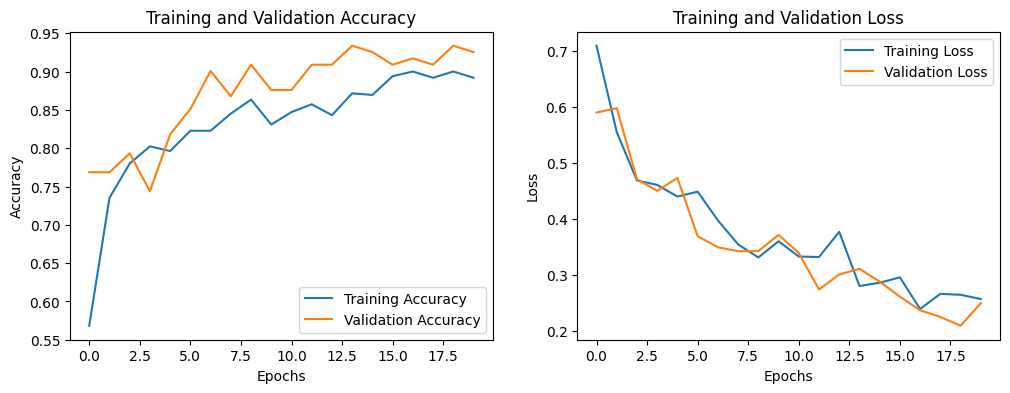

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step

Classification Report:
              precision    recall  f1-score   support

    cataract       0.95      0.90      0.92        61
      normal       0.90      0.95      0.93        60

    accuracy                           0.93       121
   macro avg       0.93      0.93      0.93       121
weighted avg       0.93      0.93      0.93       121

Confusion Matrix:
[[55  6]
 [ 3 57]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


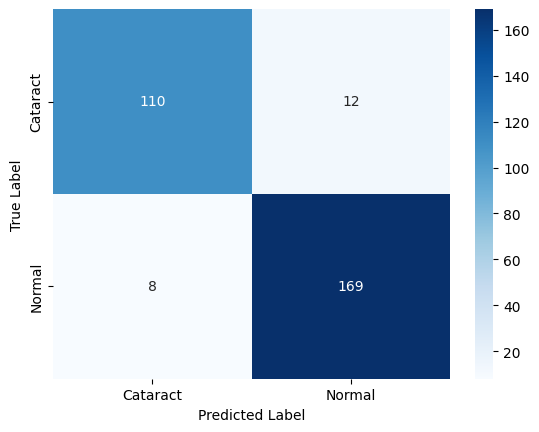

In [ ]:
# Define the CNN model


input_shape = (150, 150, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')



# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


# Generate predictions and true labels
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))



from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

num_samples = 10
true_labels = []
predictions = []

for i, (x, y) in enumerate(test_generator):
    if i >= num_samples:
        break
    true_labels.append(np.argmax(y,axis=1))
    predictions.append(np.argmax(model.predict(x), axis=1))

true_labels = np.concatenate(true_labels,axis=0)
predictions = np.concatenate(predictions,axis=0)
binary_predictions = np.round(predictions)

conf_mat = confusion_matrix(true_labels,predictions)

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Cataract', 'Normal'], yticklabels=['Cataract', 'Normal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,763,650 (60.13 MB)

 Trainable params: 1,048,962 (4.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 198s 12s/step - accuracy: 0.5673 - loss: 0.8335 - val_accuracy: 0.8678 - val_loss: 0.3317
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 186s 12s/step - accuracy: 0.7818 - loss: 0.4431 - val_accuracy: 0.8843 - val_loss: 0.2633
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 186s 12s/step - accuracy: 0.8638 - loss: 0.3481 - val_accuracy: 0.9174 - val_loss: 0.2354
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 192s 12s/step - accuracy: 0.8674 - loss: 0.3315 - val_accuracy: 0.9091 - val_loss: 0.2146
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 188s 12s/step - accuracy: 0.8884 - loss: 0.2892 - val_accuracy: 0.9339 - val_loss: 0.1975
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 189s 12s/step - accuracy: 0.8890 - loss: 0.2686 - val_accuracy: 0.9256 - val_loss: 0.1812
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 186s 11s/step - accuracy: 0.9221 - loss: 0.2478 - val_accuracy: 0.9174 - val_loss: 0.1700
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 192s 12s/step - accuracy: 0.9197 - loss: 0.2340 - val_accuracy: 0.

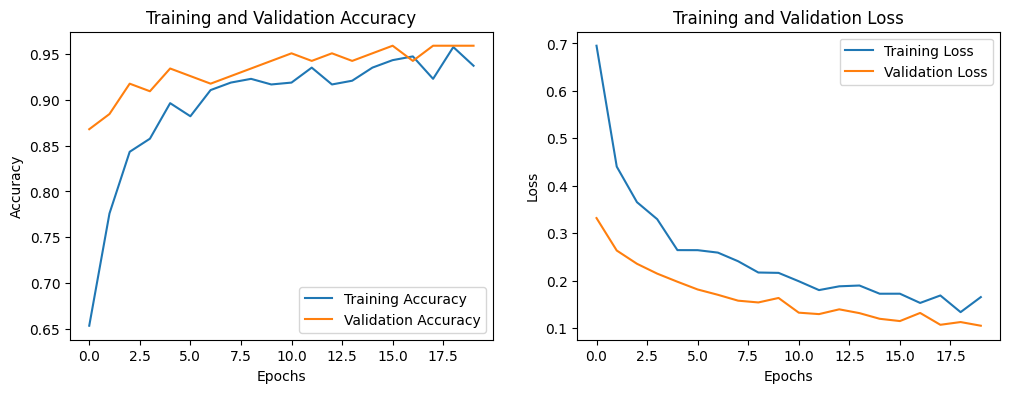

4/4 ━━━━━━━━━━━━━━━━━━━━ 35s 8s/step - accuracy: 0.9533 - loss: 0.0910
Test Accuracy: 95.87%
3/4 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 36s 8s/step

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.97      0.95      0.96        61
     Class 1       0.95      0.97      0.96        60

    accuracy                           0.96       121
   macro avg       0.96      0.96      0.96       121
weighted avg       0.96      0.96      0.96       121


Confusion Matrix:
[[58  3]
 [ 2 58]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


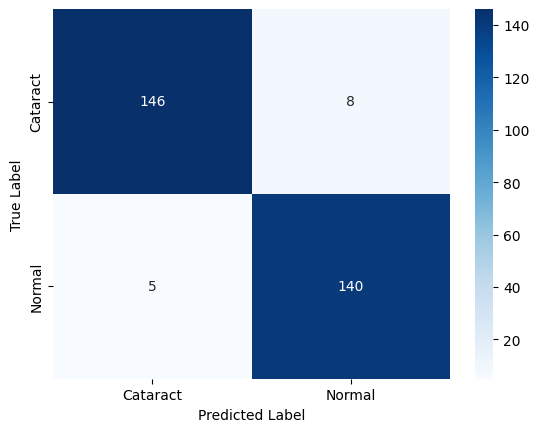

In [ ]:
#VGG16


# Define input shape
input_shape = (150, 150, 3)

# Load VGG16 model (without top layers, using pretrained weights)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Build custom model on top of VGG16
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  #  classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Generate predictions and true labels
y_true = test_generator.classes  # True labels
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)   # Get predicted class indices


# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=['Class 0', 'Class 1']))  # Assuming 'Class 0' and 'Class 1' are your class names

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))



from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

num_samples = 10
true_labels = []
predictions = []

for i, (x, y) in enumerate(test_generator):
    if i >= num_samples:
        break
    true_labels.append(np.argmax(y,axis=1))
    predictions.append(np.argmax(model.predict(x), axis=1))

true_labels = np.concatenate(true_labels,axis=0)
predictions = np.concatenate(predictions,axis=0)
binary_predictions = np.round(predictions)

conf_mat = confusion_matrix(true_labels,predictions)

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Cataract', 'Normal'], yticklabels=['Cataract', 'Normal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (None, 4, 4, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,168,962 (27.35 MB)

 Trainable params: 131,458 (513.51 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 89s 5s/step - accuracy: 0.5433 - loss: 1.1984 - val_accuracy: 0.7438 - val_loss: 0.5245
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - accuracy: 0.6332 - loss: 0.9303 - val_accuracy: 0.8347 - val_loss: 0.4359
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 71s 4s/step - accuracy: 0.6810 - loss: 0.7363 - val_accuracy: 0.8512 - val_loss: 0.3704
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 71s 4s/step - accuracy: 0.7462 - loss: 0.6284 - val_accuracy: 0.8430 - val_loss: 0.3236
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - accuracy: 0.7915 - loss: 0.4675 - val_accuracy: 0.8512 - val_loss: 0.3095
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 71s 4s/step - accuracy: 0.7983 - loss: 0.4634 - val_accuracy: 0.8760 - val_loss: 0.2779
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - accuracy: 0.8022 - loss: 0.4083 - val_accuracy: 0.8760 - val_loss: 0.2715
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 72s 5s/step - accuracy: 0.8319 - loss: 0.4036 - val_accuracy: 0.8760 - val_loss:

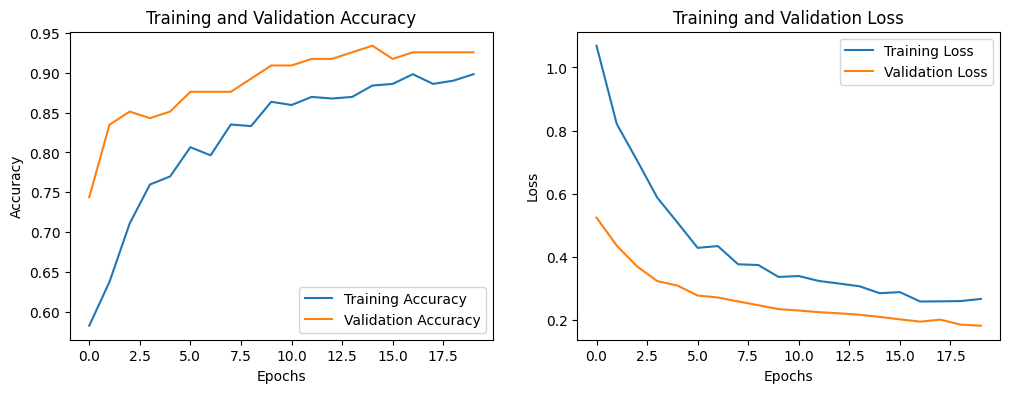

4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9130 - loss: 0.1752
Test Accuracy: 92.56%
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.95      0.90      0.92        61
     Class 1       0.90      0.95      0.93        60

    accuracy                           0.93       121
   macro avg       0.93      0.93      0.93       121
weighted avg       0.93      0.93      0.93       121


Confusion Matrix:
[[55  6]
 [ 3 57]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


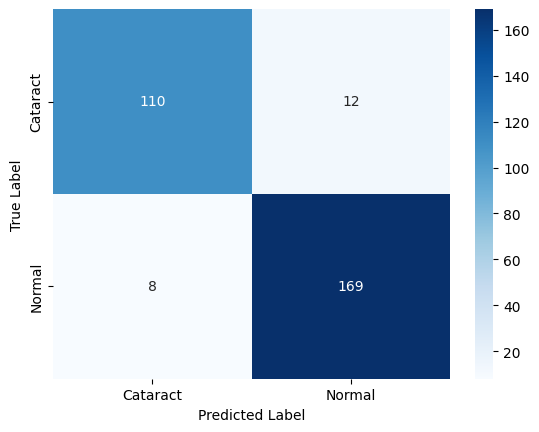

In [ ]:
#DenseNet121


# Define input shape
input_shape = (150, 150, 3)

# Load DenseNet121 model (without top layers, using pretrained weights)
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Build custom model on top of DenseNet121
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Generate predictions and true labels
y_true = test_generator.classes  # True labels
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to binary labels

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=['Class 0', 'Class 1']))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))



from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

num_samples = 10
true_labels = []
predictions = []

for i, (x, y) in enumerate(test_generator):
    if i >= num_samples:
        break
    true_labels.append(np.argmax(y,axis=1))
    predictions.append(np.argmax(model.predict(x), axis=1))

true_labels = np.concatenate(true_labels,axis=0)
predictions = np.concatenate(predictions,axis=0)
binary_predictions = np.round(predictions)

conf_mat = confusion_matrix(true_labels,predictions)

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Cataract', 'Normal'], yticklabels=['Cataract', 'Normal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 3, 3, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,065,314 (84.17 MB)

 Trainable params: 262,530 (1.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 71s 4s/step - accuracy: 0.6268 - loss: 1.0528 - val_accuracy: 0.8595 - val_loss: 0.3444
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 63s 4s/step - accuracy: 0.8195 - loss: 0.4474 - val_accuracy: 0.8760 - val_loss: 0.2972
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.8745 - loss: 0.3615 - val_accuracy: 0.8678 - val_loss: 0.2486
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 0.8600 - loss: 0.3180 - val_accuracy: 0.8926 - val_loss: 0.2238
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.8589 - loss: 0.3172 - val_accuracy: 0.8926 - val_loss: 0.2123
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 51s 3s/step - accuracy: 0.8774 - loss: 0.2647 - val_accuracy: 0.8926 - val_loss: 0.1915
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.8946 - loss: 0.2411 - val_accuracy: 0.9174 - val_loss: 0.1730
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 0.9209 - loss: 0.2049 - val_accuracy: 0.9174 - val_loss:

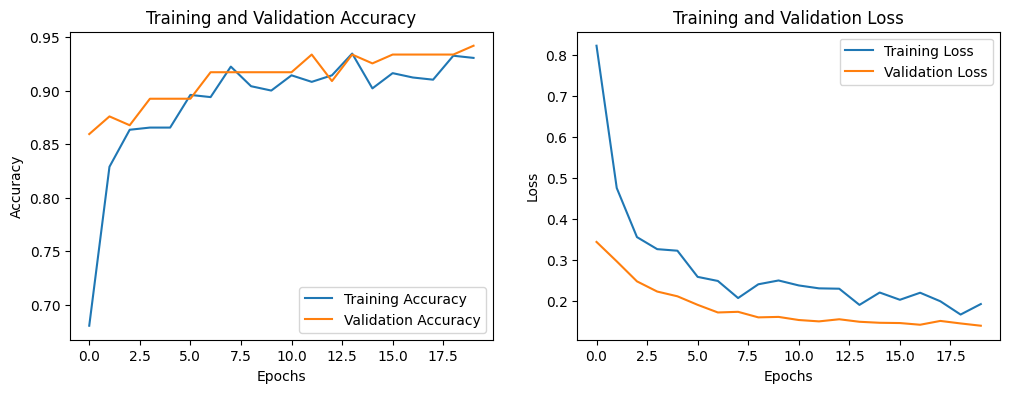

4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9446 - loss: 0.1444
Test Accuracy: 94.21%
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step
Classification Report:
              precision    recall  f1-score   support

    cataract       0.94      0.95      0.94        61
      normal       0.95      0.93      0.94        60

    accuracy                           0.94       121
   macro avg       0.94      0.94      0.94       121
weighted avg       0.94      0.94      0.94       121

Confusion Matrix:
[[58  3]
 [ 4 56]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


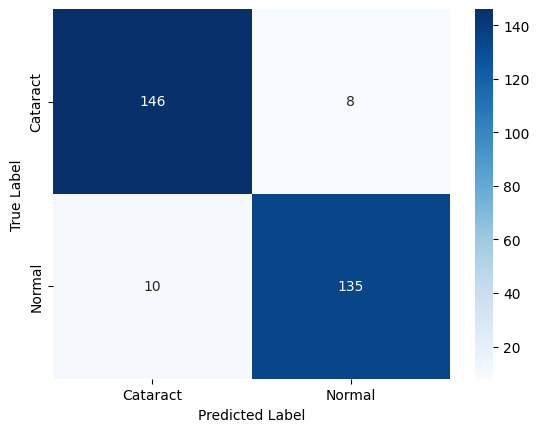

In [ ]:
#Inception V3

from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Model Definition
input_shape = (150, 150, 3)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Train Model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Evaluate Model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Generate Predictions
y_true = test_generator.classes  # True labels
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))


from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

num_samples = 10
true_labels = []
predictions = []

for i, (x, y) in enumerate(test_generator):
    if i >= num_samples:
        break
    true_labels.append(np.argmax(y,axis=1))
    predictions.append(np.argmax(model.predict(x), axis=1))

true_labels = np.concatenate(true_labels,axis=0)
predictions = np.concatenate(predictions,axis=0)
binary_predictions = np.round(predictions)

conf_mat = confusion_matrix(true_labels,predictions)

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Cataract', 'Normal'], yticklabels=['Cataract', 'Normal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<ipython-input-23-7d89f3589515>:13: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 5, 5, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,210 (9.24 MB)

 Trainable params: 164,226 (641.51 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 49s 3s/step - accuracy: 0.4294 - loss: 1.5269 - val_accuracy: 0.6942 - val_loss: 0.5485
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.6494 - loss: 0.8059 - val_accuracy: 0.8512 - val_loss: 0.3517
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.7345 - loss: 0.6170 - val_accuracy: 0.8926 - val_loss: 0.2981
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.7979 - loss: 0.4418 - val_accuracy: 0.9174 - val_loss: 0.2365
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.8115 - loss: 0.4032 - val_accuracy: 0.9339 - val_loss: 0.2110
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8424 - loss: 0.3344 - val_accuracy: 0.9339 - val_loss: 0.1957
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8617 - loss: 0.3138 - val_accuracy: 0.9339 - val_loss: 0.1790
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.8733 - loss: 0.2896 - val_accuracy: 0.9421 - val_loss:

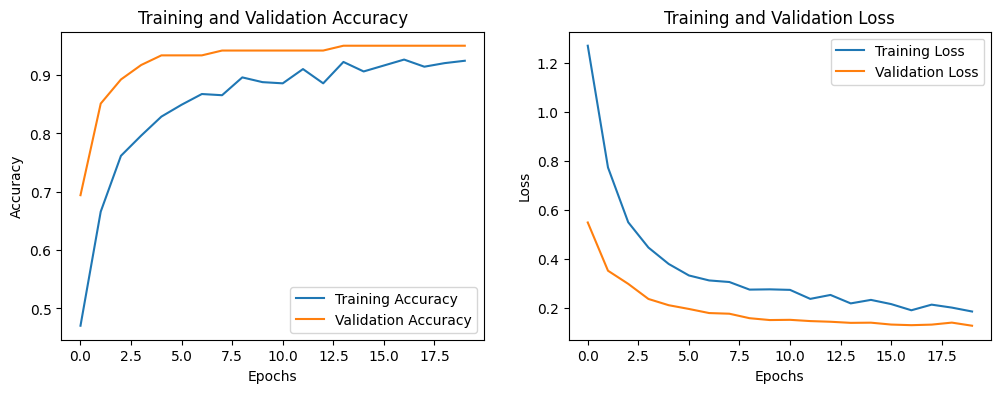

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9531 - loss: 0.1166
Test Accuracy: 95.04%
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Classification Report:
              precision    recall  f1-score   support

    cataract       0.94      0.97      0.95        61
      normal       0.97      0.93      0.95        60

    accuracy                           0.95       121
   macro avg       0.95      0.95      0.95       121
weighted avg       0.95      0.95      0.95       121

Confusion Matrix:
[[59  2]
 [ 4 56]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 929ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


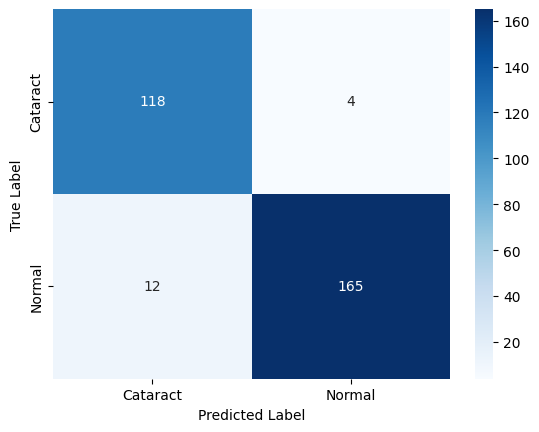

In [ ]:
#MobileNet V2

from tensorflow.keras.applications import MobileNetV2


# Define Model
input_shape = (150, 150, 3)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


# Train Model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Evaluate Model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Generate Predictions
y_true = test_generator.classes  # True labels
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))


from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

num_samples = 10
true_labels = []
predictions = []

for i, (x, y) in enumerate(test_generator):
    if i >= num_samples:
        break
    true_labels.append(np.argmax(y,axis=1))
    predictions.append(np.argmax(model.predict(x), axis=1))

true_labels = np.concatenate(true_labels,axis=0)
predictions = np.concatenate(predictions,axis=0)
binary_predictions = np.round(predictions)

conf_mat = confusion_matrix(true_labels,predictions)

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Cataract', 'Normal'], yticklabels=['Cataract', 'Normal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


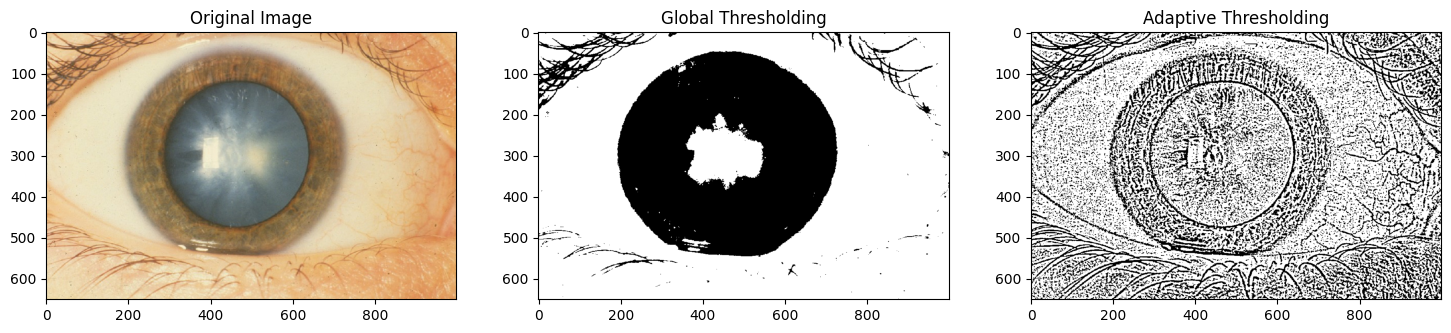

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/archive/processed_images/train/cataract/image_10.png'
image = cv2.imread(image_path)

thresh_ada = cv2.adaptiveThreshold(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

_, thresh = cv2.threshold(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), 150, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(thresh, cmap='gray')
plt.title('Global Thresholding')

plt.subplot(1, 3, 3)
plt.imshow(thresh_ada, cmap='gray')
plt.title('Adaptive Thresholding')

plt.show()